In [12]:
import tensorflow as tf
# https://youtu.be/5ECD8J3dvDQ
#a = tf.contant(5)
#b = tf.constant(5)
#c = a * b

In [13]:
#print(c)

### Tensorflow Functional API

In [14]:
# image classification with subtext in one full model
# Question Input, Image Input
# Embedding     
#  LSTM           Conv2D/MaxPooling2D stack
#         concatenate
#         Dense / softmax

In [11]:
from tensorflow.keras.models import Sequential

# example for image encoding
vision_model = Sequential()
vision_model.add(Conv2D(64, (3, 3),
                 activation='relu',
                 input_shape=(224,224,3)))
vision_model.add(MaxPooling2D())
vision_modell.add(Flatten())

# Input layer for the functional api
image_input = Input(shape=(224,224,3))
encoded_image = vision_model(image_input)

NameError: name 'Conv2D' is not defined

In [15]:
# examplef or text incoding
question_input = Input(shape=(100,),
                       dtype='int32',
                       name='Question')
embedded = Embedding(input_dim=10000,
                     output_dim=256,
                     input_length=100)(question_input)

encoded_question = LSTM(256)(embedded_question)

NameError: name 'Input' is not defined

In [17]:
# concatenate the layers 
merged = layers.concatenate([encoded_image,
                             encoded_question])

# train a classifier
output = Dense(1000, activation='softmax')(merged)
vqa_model = Model(inputs=[image_input, question_input], outputs=output)

NameError: name 'layers' is not defined

### Subclassing

In [19]:
class MyModel(tf.keras.Model):
    def __init__(self, num_classes=10):
        super(MyModel, self).__init__(name='my_model')
        self.dense_1 = layers.Dense(32, activation='relu')
        self.dense_2 = layers.Dense(num_classes, activation='softmax')
        
    # forward
    def call(self, inputs):
        x=  self.dense_1(inputs)
        # example replacing the activation function within the call
        x = tf.nn.relu(x) 
        return self.dense_2(x)

### Model Plotting

In [18]:
# Plot model
from tensorflow.keras.utils import plot_model
plot_model(vqa_model, to_file='model.png')

NameError: name 'vqa_model' is not defined

In [ ]:
model.fit(data,
         epchos=10,
         validation_data=val_data,
         callbacks=[EarlyStopping(),
                    TensorBoard(),
                    ModelCheckpoint()])

#### Training Loop example

In [ ]:
# @tf.function adds performance
@tf.function
def train_step(features, labels)
    with tf.GradientTape() as tape:
        logits = model(features, training=True)
        loss = loss_fn(labels, logits)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    return loss

### Constants and Numpy
Tensorflow has functions that mimic numpy functions

In [24]:
x = tf.constant([[5, 2], [1, 3]])
print(x)

tf.Tensor(
[[5 2]
 [1 3]], shape=(2, 2), dtype=int32)


In [25]:
x.numpy()

array([[5, 2],
       [1, 3]], dtype=int32)

In [26]:
tf.random.normal(shape=(2, 2), mean=0., stddev=1.)

<tf.Tensor: id=8, shape=(2, 2), dtype=float32, numpy=
array([[-0.03265592, -0.06797294],
       [ 0.3151153 , -1.5585144 ]], dtype=float32)>

In [27]:
tf.random.normal(shape=(2, 2), mean=0., stddev=1.).numpy()

array([[ 0.45324567, -0.13361892],
       [-1.9691302 , -0.18071455]], dtype=float32)

In [28]:
c = tf.constant(5)
tf.square(c)

<tf.Tensor: id=16, shape=(), dtype=int32, numpy=25>

### Gradients

In [29]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
    g.watch(x)
    y = x * x
    
dy_dx = g.gradient(y, x)

In [30]:
dy_dx # 6.0

<tf.Tensor: id=22, shape=(), dtype=float32, numpy=6.0>

### Example to find values of m and b for a linear regression model

In [63]:
def make_scatterplot(m=0.1, b=0.2, n=100):
    x = tf.random.uniform(shape=(n,))
    # move intercept around
    noise = tf.random.normal(shape=(len(x),), stddev=0.02)
    y = m * x + b + noise
    return x, y

In [64]:
x_train, y_train = make_scatterplot()

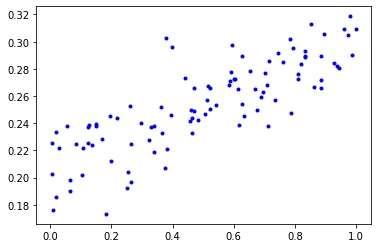

In [65]:
import matplotlib.pyplot as plt
plt.plot(x_train, y_train, 'b.')

In [66]:
m = tf.Variable(0.)
b = tf.Variable(0.)

In [67]:
def predict(x):
    y = m * x + b
    return y

In [68]:
# Loss function
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [69]:
loss = squared_error(predict(x_train), y_train)
print("Starting Loss", loss.numpy())

Starting Loss 0.06540269


In [71]:
learning_rate = 0.05
steps = 200
# gradient descent manually, would normally use model.fit
for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = predict(x_train)
        loss = squared_error(predictions, y_train)
        
    gradients = tape.gradient(loss, [m, b])
    m.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)
    if i % 20 == 0:
        print(f'Step {i}, Loss {loss.numpy()}')

Step 0, Loss 0.06540268659591675
Step 20, Loss 0.0006531482795253396
Step 40, Loss 0.0003661966766230762
Step 60, Loss 0.0003624212113209069
Step 80, Loss 0.00036047465982846916
Step 100, Loss 0.0003589870175346732
Step 120, Loss 0.00035784687497653067
Step 140, Loss 0.00035697323619388044
Step 160, Loss 0.00035630364436656237
Step 180, Loss 0.00035579048562794924
